In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set.style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader.data as web
from datetime import datetime

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock]  = web.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,149.671389,150.634246,148.716306,149.777420,148.711621,2.707343e+07
std,15.138441,15.228178,14.866729,15.032385,15.578248,1.128454e+07
min,115.800003,116.330002,114.760002,115.820000,113.986984,1.402670e+07
25%,141.462498,142.029995,140.570000,141.364998,139.730885,2.034908e+07
50%,151.519996,153.334999,149.924995,151.455001,150.481575,2.438550e+07
75%,159.297496,160.477501,158.134998,159.677494,158.931526,2.973205e+07
max,175.110001,177.199997,174.860001,176.419998,176.419998,1.119850e+08


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-12-27 to 2017-12-26
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


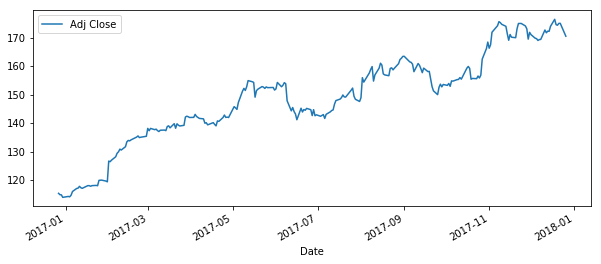

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

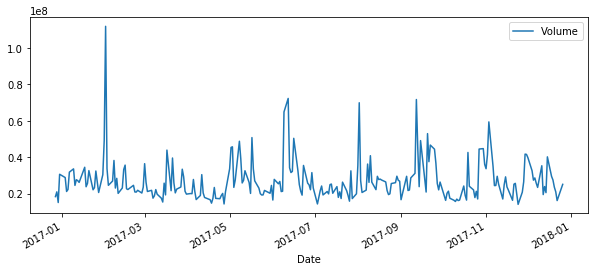

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
na_day = [10,20,50]

for na in na_day:
    column_name = 'NA for %s days'%(str(na))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],na)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


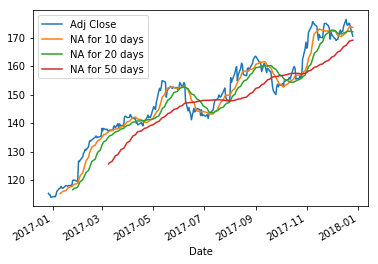

In [15]:
AAPL[['Adj Close','NA for 10 days','NA for 20 days','NA for 50 days']].plot()

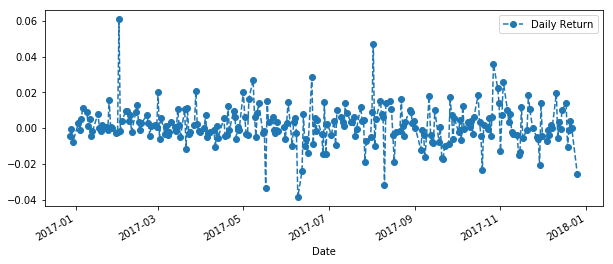

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

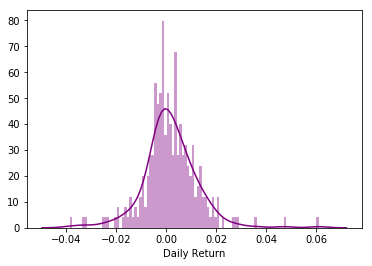

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

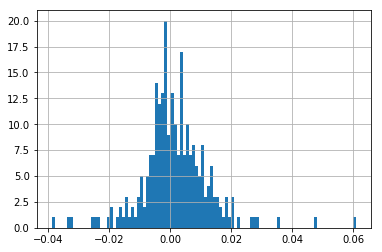

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df  = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,170.470001,1176.314941,1055.500000,85.345001
2017-12-22,175.009995,1168.359985,1060.119995,85.510002
2017-12-21,175.009995,1174.760010,1063.630005,85.500000
2017-12-20,174.350006,1177.619995,1064.949951,85.519997
2017-12-19,174.539993,1187.380005,1070.680054,85.830002


In [21]:
tech_rets = closing_df.pct_change()
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,NaN,NaN,NaN,NaN
2017-12-22,0.026632,-0.006763,0.004377,0.001933
2017-12-21,0.000000,0.005478,0.003311,-0.000117
2017-12-20,-0.003771,0.002435,0.001241,0.000234
2017-12-19,0.001090,0.008288,0.005381,0.003625
2017-12-18,0.010771,0.002695,0.006034,0.006408
2017-12-15,-0.013887,-0.009609,-0.012023,0.005441
2017-12-14,-0.010059,-0.004139,-0.014133,-0.024870
2017-12-13,0.000290,-0.008627,-0.008140,0.007793


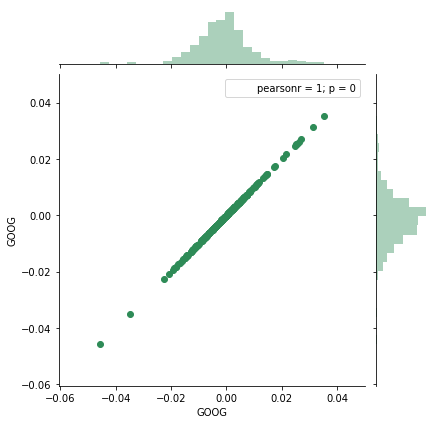

In [22]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

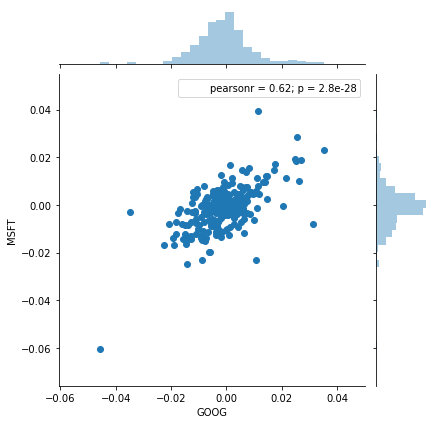

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [24]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,NaN,NaN,NaN,NaN
2017-12-22,0.026632,-0.006763,0.004377,0.001933
2017-12-21,0.000000,0.005478,0.003311,-0.000117
2017-12-20,-0.003771,0.002435,0.001241,0.000234
2017-12-19,0.001090,0.008288,0.005381,0.003625


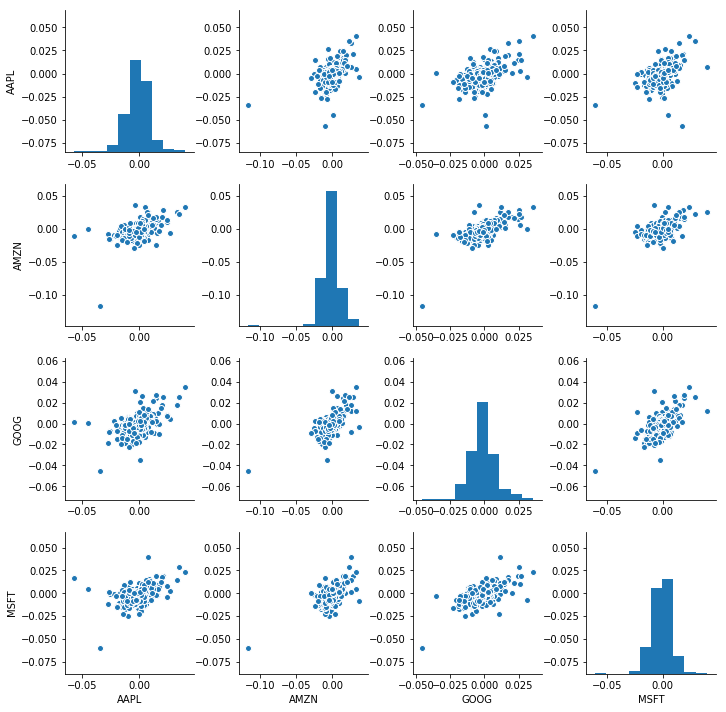

In [25]:
sns.pairplot(tech_rets.dropna())

/usr/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


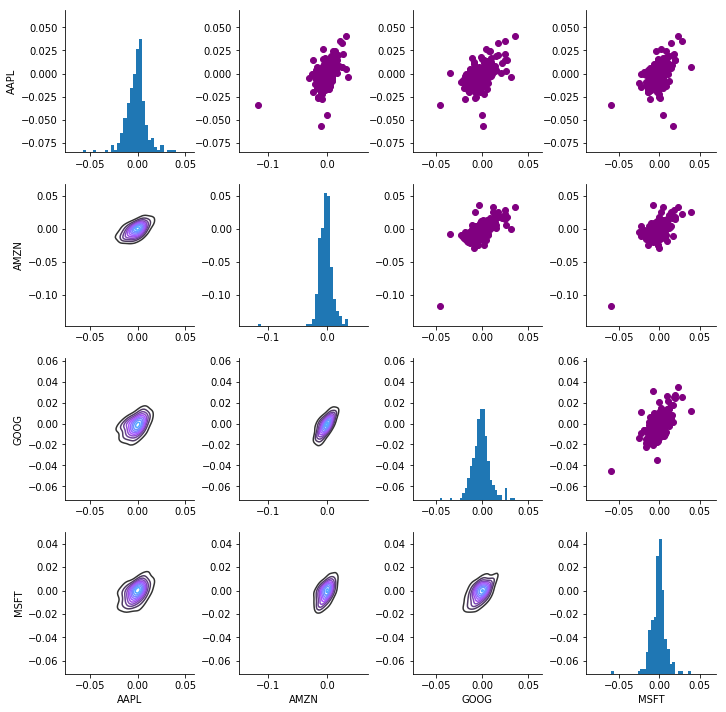

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

/usr/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


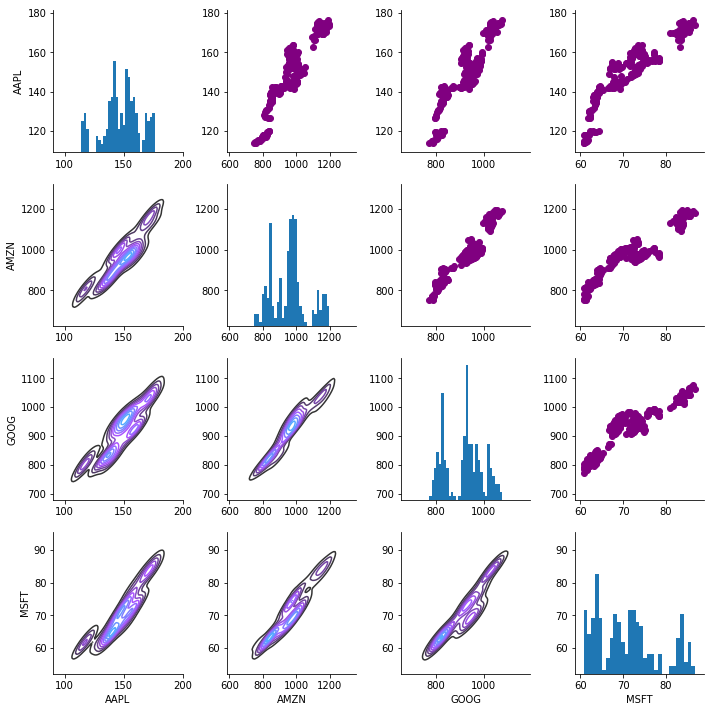

In [29]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [33]:
from seaborn.linearmodels import corrplot,symmatplot

sns.corrplot(tech_rets.dropna(),annot=True)

/usr/lib/python3.6/site-packages/seaborn/linearmodels.py:5: UserWarning: The `linearmodels` module has been renamed `regression`.
  warnings.warn(msg)


ImportError: cannot import name 'corrplot'

In [34]:
rets = tech_rets.dropna()

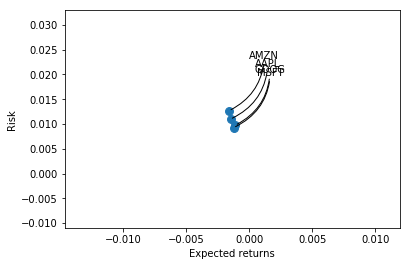

In [35]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

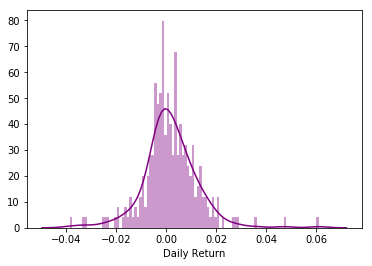

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [37]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-22,0.026632,-0.006763,0.004377,0.001933
2017-12-21,0.000000,0.005478,0.003311,-0.000117
2017-12-20,-0.003771,0.002435,0.001241,0.000234
2017-12-19,0.001090,0.008288,0.005381,0.003625
2017-12-18,0.010771,0.002695,0.006034,0.006408


In [38]:
rets['AAPL'].quantile(0.05)

-0.017923421987233124

In [39]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [40]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] +  (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [41]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100
2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800
2016-12-29,783.330017,785.929993,778.919983,782.789978,782.789978,742200
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300


Text(0.5,1,'Monte Carlo Analysis for Google')

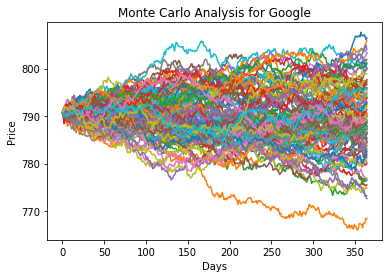

In [42]:
start_price = 790.68

for  run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [46]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] =  stock_monte_carlo(start_price,days,mu,sigma)[days-1]


In [ ]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins)